# A report of the 2020-21 school season

Between the 14th of September and the 20th of June, the day I completed my high school diploma, I registered every hour I studied using ["The Pomodoro Technique"](https://francescocirillo.com/pages/pomodoro-technique).

This method consists in splitting time into different frames, a 25 minutes long timeframe in which the user works/studies and a 5 minutes long one that lets you rest; after four blocks that take up a total of two hours the user can take a longer break.

As I said earlier I registered every pomodoro I completed (and grade I received) since the 1st of January 2020 in an Excel database and in this report I'm going to focus on the data I entered between the September of 2020 and the 20th of June (My [2020 year report](https://public.tableau.com/app/profile/tommaso6246/viz/Resoconto2020/Dashboard1) made in Tableau concentrates on 2020 as a whole).

In this report I'm going to gather general information about my last high school season like the number of hours I studied, the average amount of pomodoris I did every day, the number of days I didn't study, and also finding some particular facts on every subject like the number of distractions I had while studying.

In this project I'm going to use some of the newer pieces of information I learned during my Codecademy "Data Scientist" path like:
* Creating Dataframes with Pandas
* Data Tiding and Wrangling
* Basic Statistics tools
* Plotting diagrams with Matplotlib and Pandas
* And a lot more...

In [23]:
# Let's start by importing Pandas, Math, Datetime, Scipy, Seaborn, Matplotlib and Numpy, since they're going to be used later

import pandas as pd
import math
import numpy as np
import datetime
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# Importing both Excel datasets (converted into csv files) and trasforming them into Pandas Dataframes

pomodori = pd.read_csv("Registrazioni-Pomodori.csv")
voti = pd.read_csv("Registrazioni-Voti.csv")

In [24]:
print(pomodori.head())

       DATA       TIPO  MATERIA ATTIVITA'  POMODORI  IMPREVISTI
0  9/1/2020  NO STUDIO      NaN       NaN         0         NaN
1  9/2/2020     STUDIO  INGLESE    TEORIA         1         0.0
2  9/2/2020     STUDIO     ARTE    TEORIA         2         0.0
3  9/3/2020     STUDIO     ARTE  ESERCIZI         1         0.0
4  9/4/2020     STUDIO     ARTE  ESERCIZI         4         0.0


In [25]:
print(voti.head())
print(pomodori.columns)

        DATA   VOTO     MATERIA
0  9/26/2020  10.00  MATEMATICA
1  11/3/2020   9.25  MATEMATICA
2  12/4/2020   7.00  MATEMATICA
3  1/13/2021   8.50  MATEMATICA
4  2/12/2021   9.00  MATEMATICA
Index(['DATA', 'TIPO', 'MATERIA', 'ATTIVITA'', 'POMODORI', 'IMPREVISTI'], dtype='object')


Let's start by looking at how our two tables are made:
"pomodori" contains 6 columns:
* "DATA": corresponds to the date on which the set of pomodori was completed
* "TIPO": expresses if in that  particular day I studied
* "MATERIA": states what type of subject was done
* "ATTIVITA": declares if I studied theory or did some exercise
* "POMODORI": tells how many pomodori were made
* "IMPREVISTI": indicates how many times I stopped working in the intended period

"voti" instead contains 3 columns:
* "DATA": corresponds to the date on which the exam was done
* "VOTO": expresses the grade I got
* "MATERIA": states what type of subject does the grade stands for

Before starting to toy around with these two datasets they need to be tidied, in fact there are many problems:
1) It could be useful changing the name of the columns to variable-like ones (ex. "ATTIVITA" to "attivita")

2) in both datasets we need to change the "DATA" column from a string object to a datetime one

3) Delete non-necessary lines

In [26]:
# Let's start by point one
pomodori.rename(columns={"DATA":"data", "TIPO":"tipo", "MATERIA":"materia", "ATTIVITA'":"attivita", "POMODORI":"pomodori", "IMPREVISTI":"imprevisti"}, inplace=True)

voti.rename(columns={"DATA":"data", "VOTO":"voto", "MATERIA":"materia"}, inplace=True)

In [27]:
# And now point two
pomodori.data = pd.to_datetime(pomodori.data)

voti.data = pd.to_datetime(voti.data)

In [28]:
# At last point three
pomodori.dropna(subset = ["data"], inplace=True)

After polishing our datasets let's start looking at some of the general statistics of this school season.

In [29]:
# How many pomodori have I done this year?

pom = np.sum(pomodori.pomodori)

minutes = round(pom*25, 2)
hours = round(minutes/60)
days = round(hours/24)


print("I have done a total of " + str(pom) + " pomodori")
print("It equals to:")
print(str(minutes) + " minutes")
print(str(hours) + " hours")
print(str(days) + " days") 

I have done a total of 1302 pomodori
It equals to:
32550 minutes
542 hours
23 days


In [30]:
# How many days did I not study?
print(len(pomodori[pomodori.tipo == "NO STUDIO"]))

23


To keep inferring information in this dataset I think we should change how the data is displayed, from the number of pomodoris I did for a subject in a particular day to the number of general pomodoris completed on a particular day. In this particular dataset it's not important the type of subject or activity, but the number of pomodori in general.

In [31]:
new_data = []
today = 0

# I had to add the first row outside of the loop since the loop needed the value before i and it wouldn't work with i=0
new_data.append([pomodori.data[0], pomodori.pomodori[0]])

for i in range(1, len(pomodori.data)):
    if pomodori.data[i] != pomodori.data[i-1]:
        new_data.append([pomodori.data[i], pomodori.pomodori[i]])
        today = pomodori.pomodori[i]
    else:
        new_data.remove([pomodori.data[i-1], today])
        today += pomodori.pomodori[i]
        new_data.append([pomodori.data[i], today])
        
pomodori_general = pd.DataFrame(new_data, columns = ['data', 'pomodori'])
print(pomodori_general.head())

        data  pomodori
0 2020-09-01         0
1 2020-09-02         3
2 2020-09-03         1
3 2020-09-04         4
4 2020-09-05         0


In [32]:
pomodori_general_week = pomodori_general.groupby([pd.Grouper(key='data', freq='W-MON')])['pomodori'].sum().reset_index().sort_values('data')
print(pomodori_general_week.head())

pomodori_general_month = pomodori_general.groupby([pd.Grouper(key='data', freq='M')])['pomodori'].sum().reset_index().sort_values('data')
months=["September", "October", "November", "December", "January", "February", "March", "April", "May", "June"]
m_pomodori=[]
for i in range(0, len(months)):
    m_pomodori.append(pomodori_general_month.pomodori[i])

pomodori_general_month = pd.DataFrame({"month":months, "pomodori":m_pomodori})
print(pomodori_general_month.head())

        data  pomodori
0 2020-09-07        28
1 2020-09-14        10
2 2020-09-21        16
3 2020-09-28        36
4 2020-10-05        24
       month  pomodori
0  September       100
1    October       143
2   November       150
3   December        94
4    January       141


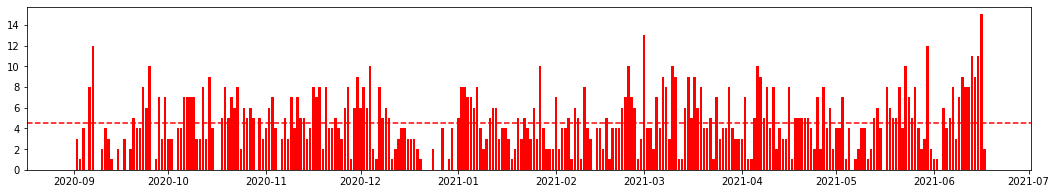

The most productive day was: 2021-06-16 00:00:00 with 15 pomodoris completed
In average I did 4.51 pomodoris per day


In [33]:
max_index = pomodori_general.pomodori.idxmax()
max_day_pom = max(pomodori_general.pomodori)
max_day_mon = pomodori_general.data[max_index]

mean = round(np.mean(pomodori_general.pomodori), 2)

plt.figure(figsize=(18,3))
plt.bar(pomodori_general.data, pomodori_general.pomodori, color="red")
plt.axhline(mean, linestyle = "--", color = "red")
plt.show()

print("The most productive day was: " + str(max_day_mon) + " with " + str(max_day_pom) + " pomodoris completed")
print("In average I did " + str(mean) + " pomodoris per day")

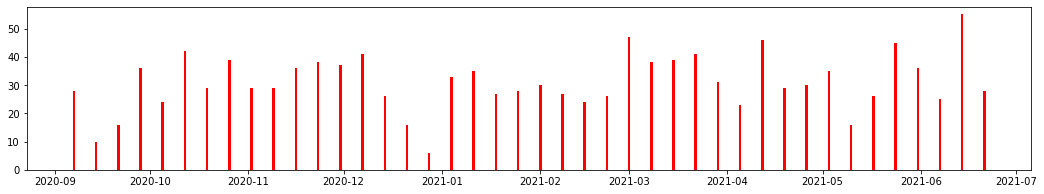

The week with most and less pomodoris completed were respectively 2021-06-14 00:00:00 (55 completed) and 2020-12-28 00:00:00 (6)


In [34]:
plt.figure(figsize=(18,3))
plt.bar(pomodori_general_week.data, pomodori_general_week.pomodori, color="red")
plt.show()

max_index = pomodori_general_week.pomodori.idxmax()
max_week_pom = max(pomodori_general_week.pomodori)
max_week_mon = pomodori_general_week.data[max_index]

min_index = pomodori_general_week.pomodori.idxmin()
min_week_pom = min(pomodori_general_week.pomodori)
min_week_mon = pomodori_general_week.data[min_index]

print("The week with most and less pomodoris completed were respectively " + str(max_week_mon) + " (" + str(max_week_pom) + " completed)"
      + " and " + str(min_week_mon) + " (" + str(min_week_pom) + ")")

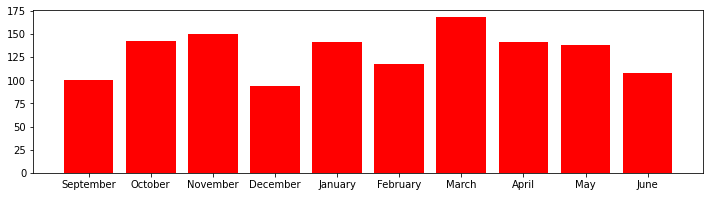

The months with most and less pomodoris completed were respectively March (168 completed) and December (94).
June had a frequency of pomodoris per day equal to: 6.35 pomodoris per day, greater than March's frequency of 5.42 after a difference of 0.93 pomodoris/day.


In [35]:
plt.figure(figsize=(12,3))
plt.bar(pomodori_general_month.month, pomodori_general_month.pomodori, color="red")
plt.show()

max_index = pomodori_general_month.pomodori.idxmax()
max_month_pom = max(pomodori_general_month.pomodori)
max_month_mon = pomodori_general_month.month[max_index]

min_index = pomodori_general_month.pomodori.idxmin()
min_month_pom = min(pomodori_general_month.pomodori)
min_month_mon = pomodori_general_month.month[min_index]

print("The months with most and less pomodoris completed were respectively " + max_month_mon + " (" + str(max_month_pom) + " completed)"
      + " and " + min_month_mon + " (" + str(min_month_pom) + ").")

freq_june = round(pomodori_general_month.loc[pomodori_general_month['month'] == "June", 'pomodori'].iloc[0]/17, 2)
freq_march = round(pomodori_general_month.loc[pomodori_general_month['month'] == "March", 'pomodori'].iloc[0]/31, 2)
diff = round(freq_june - freq_march, 2)
print("June had a frequency of pomodoris per day equal to: " + str(freq_june) + " pomodoris per day, greater than March's frequency of "
      + str(freq_march) + " after a difference of " + str(diff) + " pomodoris/day.")

With these three plots we can extrapolate how much pomodoris I did every day, week, and month.
In particular, the most important facts we can find are:
1) Most of the days spent without studying were in the first trimester

2) March was the month with the most pomodoris, but June had a greater frequency

3) The week before the "maturità" was the most productive, the least productive was the one after Christmas

4) The most productive day was the day before "maturità"

Now let's look at the pomodoris done in every single subject by returning to our original dataset:


In [36]:
subject_dict = {}

for i in range(0, len(pomodori)):
    if pomodori.pomodori[i] != 0:
        if pomodori.materia[i] not in subject_dict:
            subject_dict[pomodori.materia[i]] = 0
        subject_dict[pomodori.materia[i]] += pomodori.pomodori[i]

subject_dict_impr = {}

for i in range(0, len(pomodori)):
    if pomodori.pomodori[i] != 0 and pomodori.imprevisti[i] != 0:
        if pomodori.materia[i] not in subject_dict_impr:
            subject_dict_impr[pomodori.materia[i]] = 0
        subject_dict_impr[pomodori.materia[i]] += math.trunc(pomodori.imprevisti[i])



for i in subject_dict.keys():
    hours = math.trunc(subject_dict[i]*25/60)
    if i in subject_dict_impr:
        print("I studied " + str(i) + " for a total of " + str(subject_dict[i]) + " pomodoris (equal to " + str(hours) +  " hours), it also had " + str(subject_dict_impr[i]) + " accidents.")
    else:
        print("I studied " + str(i) + " for a total of " + str(subject_dict[i]) + " pomodoris (equal to " + str(hours) +  " hours), it also had no accidents")
    print(" ")

I studied INGLESE for a total of 87 pomodoris (equal to 36 hours), it also had 12 accidents.
 
I studied ARTE for a total of 167 pomodoris (equal to 69 hours), it also had 18 accidents.
 
I studied ITALIANO for a total of 199 pomodoris (equal to 82 hours), it also had 23 accidents.
 
I studied MATEMATICA for a total of 199 pomodoris (equal to 82 hours), it also had 14 accidents.
 
I studied SCIENZE for a total of 262 pomodoris (equal to 109 hours), it also had 22 accidents.
 
I studied FISICA for a total of 173 pomodoris (equal to 72 hours), it also had 13 accidents.
 
I studied LATINO for a total of 80 pomodoris (equal to 33 hours), it also had 11 accidents.
 
I studied FILOSOFIA for a total of 58 pomodoris (equal to 24 hours), it also had 8 accidents.
 
I studied STORIA for a total of 58 pomodoris (equal to 24 hours), it also had 5 accidents.
 
I studied ED. FISICA for a total of 10 pomodoris (equal to 4 hours), it also had no accidents
 
I studied RELIGIONE for a total of 4 pomodori

Science (SCIENZE) was surprisingly the most studied subject with 262 pomodoris, the second place shared by Italian (ITALIANO) and math (MATEMATICA) (199 pomodoris) and at third place physics (FISICA) (173 pomodoris).

Coincidentally philosophy (FILOSOFIA) and history (STORIA) had the same number of pomodoris that would equal to one day of studying per subject.

Italian (ITALIANO) had the most accidents, but English (INGLESE) and philosophy (FILOSOFIA) had a higher rate of accidents (0.138 per pomodoro).

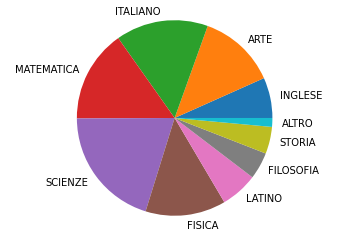

In [37]:
subj_data = [x for x in subject_dict.values()]
subj_labels = [x for x in subject_dict.keys()]

# Creating "Others" part of pie

subj_data_new = []
subj_labels_new = []
other = 0
for i in range(0, len(subj_data)):
    if subj_data[i] <= 10:
        other += subj_data[i]
    else:
        subj_data_new.append(subj_data[i])
        subj_labels_new.append(subj_labels[i])
subj_data_new.append(other)
subj_labels_new.append("ALTRO")
        
plt.pie(subj_data_new,labels=subj_labels_new)
plt.axis('equal')
plt.show()

Now let's look at the voti dataset, especially the mean, median and mode of every single subject

In [38]:
subj_voti = {}
all_grades = []
media_list = []
moda_list = []
mediana_list = []
for i in range(0, len(voti)):
    if voti.materia[i] not in subj_voti:
        subj_voti[voti.materia[i]] = []
    subj_voti[voti.materia[i]].append(voti.voto[i])
    all_grades.append(voti.voto[i])
    
for i in subj_voti.keys():
    moda = scipy.stats.mode(subj_voti[i])[0][0]
    media = round(np.mean(subj_voti[i]), 2)
    mediana = round(np.median(subj_voti[i]), 2)
    
    moda_list.append(moda)
    mediana_list.append(mediana)
    media_list.append(media)
    
    print("The mean, median, mode of " + i + " are respectively " + str(media) + ", " + str(mediana) + " and " + str(moda) + ".")
    print(" ")

mmm = [media_list, mediana_list, moda_list]

total_moda = scipy.stats.mode(all_grades)[0][0]
total_media = round(np.mean(all_grades), 2)
total_mediana = round(np.median(all_grades), 2)   
print(" ")
print(" ")
print("The overall mean, median and mode are " + str(total_media) + ", " + str(total_mediana) + " and " + str(total_moda))

The mean, median, mode of MATEMATICA are respectively 9.12, 9.38 and 10.0.
 
The mean, median, mode of FISICA are respectively 8.18, 8.0 and 6.75.
 
The mean, median, mode of ITALIANO are respectively 7.41, 7.5 and 6.5.
 
The mean, median, mode of LATINO are respectively 7.55, 7.5 and 7.5.
 
The mean, median, mode of STORIA are respectively 8.38, 8.25 and 8.0.
 
The mean, median, mode of FILOSOFIA are respectively 8.25, 8.25 and 8.0.
 
The mean, median, mode of INGLESE are respectively 8.71, 8.5 and 7.75.
 
The mean, median, mode of ARTE are respectively 6.69, 6.75 and 6.75.
 
The mean, median, mode of SCIENZE are respectively 8.18, 7.75 and 7.5.
 
The mean, median, mode of ED. FISICA are respectively 8.36, 9.0 and 9.0.
 
The mean, median, mode of RELIGIONE are respectively 7.67, 8.0 and 8.0.
 
The mean, median, mode of ED. CIVICA are respectively 7.61, 7.75 and 8.0.
 
 
 
The overall mean, median and mode are 7.97, 8.0 and 8.0


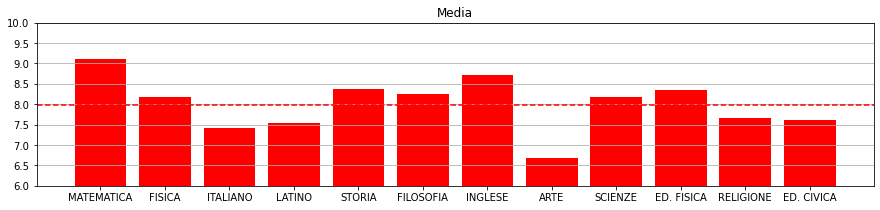

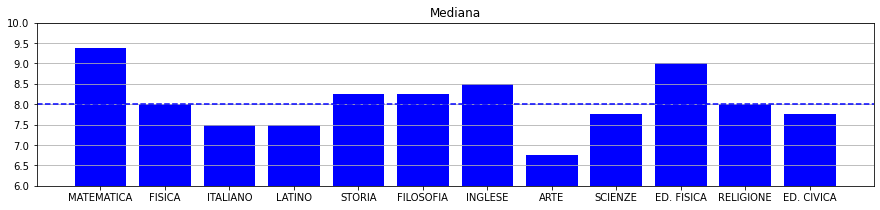

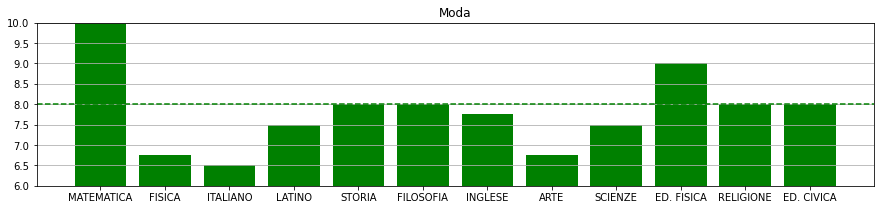

In [39]:
for i in mmm:
    plt.figure(figsize=(15, 3))
    plt.ylim([6, 10])
    plt.grid(axis="y")
    if i == moda_list:
        plt.title("Moda")
        plt.bar(subj_voti.keys(), i, color="green")
        plt.axhline(total_moda, linestyle = "--", color = "green")
    elif i == media_list:
        plt.title("Media")
        plt.bar(subj_voti.keys(), i, color="red")
        plt.axhline(total_media, linestyle = "--", color = "red")    
    elif i == mediana_list:
        plt.title("Mediana")
        plt.bar(subj_voti.keys(), i, color="blue")
        plt.axhline(total_mediana, linestyle = "--", color = "blue")
    plt.show()

Art was by far the worst subject of the year, with Italian and Latin that come to a close second.

Math was my best subject, I'm really happy that its mode is equal to 10; the same mode was the only one with PE's one that was higher than the total mode.

The difference between humanistic and scientific subjects is easily visible.

Now let's try something more difficult, let's work with the pomodori and voti datasets to look at: how many pomodoris I studied for each test, the average amount of pomodoris needed to get a grade by looking at the 10 days before the day of the test by using a logarithmic curve, in my opinion the best curve for this type of work, since lower grades can be achieved with less study, but there's a lot of pomodoris to do if I want to gain a 10.

(Since I studied a lot on every test I can't check if a lower amount of pomodoris correspond to lower grades, so the assumption that less study = lower grades is only theoretical and not empirical)

In [40]:
# The intentions of this block of code were: finding the timeframe before the test, and add to a variable the number
# of pomodoris to an int variable, then make a nested list, the internal one contains the grade and the number of pomodoris
# the external one contains every grade_pomodoris association; every nested list is part of a dictionary for every subject

subj_list = {}

# Added subj_list_mean later to find the average number of pomodoris I did in preparation of a test 
subj_list_mean = {}

for i in voti.materia:
    subj_list[i] = []
    subj_list_mean[i] = []
    
for i in range(0, len(voti)):
    pomodori_studied = 0
    subject = voti.materia[i]
    
    days_before = datetime.timedelta(10)
    initial_data = voti.data[i] - days_before
    last_data = voti.data[i]
    
    for y in range(0, len(pomodori)):
        if initial_data <= pomodori.data[y] and pomodori.data[y] <= last_data and pomodori.materia[y] == subject:
            pomodori_studied += pomodori.pomodori[y]
    
    subj_list_mean[voti.materia[i]].append(pomodori_studied)
    grade_pomodori=[voti.voto[i], pomodori_studied]
    subj_list[voti.materia[i]].append(grade_pomodori)

In [41]:
# To find the best curve for every subject I use every datapoint given by the pair [grade, number of pomodoris] and try to find
# the one with the smallest error between all of them given a z variable as the base of the log; 
# After finding it I can compare the different curves to find the most and least steep of all.
# I'm going to use a block of code that I developed during a Codecademy project to find the best slope given a set of datapoints

def calculate_error(z, point):
    y_point, x_point = point
    y = math.log((x_point + 1), z)
    distance = abs(y - y_point)
    return distance

def calculate_all_error(z, points):
    total_error = 0
    for point in datapoints:
        point_error = calculate_error(z, point)
        total_error += point_error
    return total_error

possible_zs = [z * 0.01 for z in range(101, 1000)]

subj_base = {}

for i in subj_list.keys():
    datapoints = subj_list[i]
    
    smallest_error = float("inf")
    best_z = 0

    for z in possible_zs:
        error = calculate_all_error(z, datapoints)
        if error < smallest_error:
            best_z = z
            smallest_error = error 

    subj_base[i] = best_z

# Discovered a week later that there is a function in the numpy library to do this kind of things...
# I'm still going to keep my code since it uses the base of the logarthm as a variable and I enjoyed building it.
# This is how to do it in a couple of lines:
# [m, b] = np.polyfit(np.log(x+1), y, 1) --> y = m*log(x+1) + b


# Removing ED. FISICA, ED. CIVICA, RELIGIONE because of lack of pomodoris done compared to the other
del subj_base["ED. FISICA"]
del subj_base["ED. CIVICA"]
del subj_base["RELIGIONE"]

del subj_list_mean["ED. FISICA"]
del subj_list_mean["ED. CIVICA"]
del subj_list_mean["RELIGIONE"]

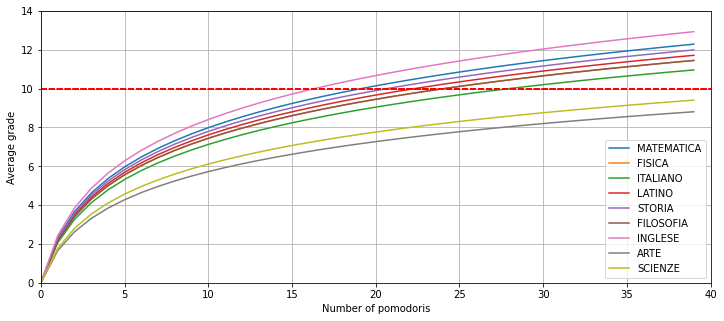

In [42]:
plt.figure(figsize=(12, 5))
plt.xlim(0, 40)
plt.ylim(0, 14)
for i in subj_base.keys():
    x = range(0, 40)  
    y = []
    for X in x:
        y_log = math.log((X+1), subj_base[i])
        y.append(y_log)
        
    plt.plot(x, y, label=i)
    plt.legend()
    plt.grid()
    plt.axhline(10, color="red", linestyle="--")
    plt.xlabel("Number of pomodoris")
    plt.ylabel("Average grade")

plt.show()

In [43]:
for i in subj_base.keys():
    x_10 = round((subj_base[i] ** 10) - 1)
    mean = round(np.mean(subj_list_mean[i]))
    print("To earn a 10 in " + i + " I needed to study in average at least " + str(x_10), " pomodoris, I did in average " + str(mean) + " pomodoris.")
    print(" ")

To earn a 10 in MATEMATICA I needed to study in average at least 19  pomodoris, I did in average 15 pomodoris.
 
To earn a 10 in FISICA I needed to study in average at least 24  pomodoris, I did in average 14 pomodoris.
 
To earn a 10 in ITALIANO I needed to study in average at least 28  pomodoris, I did in average 15 pomodoris.
 
To earn a 10 in LATINO I needed to study in average at least 22  pomodoris, I did in average 10 pomodoris.
 
To earn a 10 in STORIA I needed to study in average at least 21  pomodoris, I did in average 10 pomodoris.
 
To earn a 10 in FILOSOFIA I needed to study in average at least 24  pomodoris, I did in average 11 pomodoris.
 
To earn a 10 in INGLESE I needed to study in average at least 16  pomodoris, I did in average 8 pomodoris.
 
To earn a 10 in ARTE I needed to study in average at least 65  pomodoris, I did in average 10 pomodoris.
 
To earn a 10 in SCIENZE I needed to study in average at least 49  pomodoris, I did in average 17 pomodoris.
 


One last type of data I can inquire in this datasets is the "attivita" column to check if a certain pomodoro was focused primarly on theory (TEORIA) or exercise (ESERCIZI).

In [44]:
theory = np.sum(pomodori.pomodori[pomodori.attivita == "TEORIA"])
exercise = np.sum(pomodori.pomodori[pomodori.attivita == "ESERCIZI"])
length = np.sum(pomodori.pomodori)
print("I did " + str(theory) + " pomodoris focused on theory " + str(round(100*theory/length)) + "% of the pomodoris")
print("I did " + str(exercise) + " pomodoris focused on theory " + str(round(100*exercise/length)) + "% of the pomodoris")

I did 856 pomodoris focused on theory 66% of the pomodoris
I did 446 pomodoris focused on theory 34% of the pomodoris


The most important take on this information is that the amount of pomodoris spent on theory has increased since the 2020 report,  there is a 15% difference between the two datasets in the ratio of pomodoris spent exercising or studying theory. 

## Conclusions

I'm pretty proud of my last high school season, the study method using the pomodoris has been helpful during the year and the grades I achieved confirmed it.

While the final grade given to me is a 72/100, a relatively low outcome primarily caused by the past years in which I didn't do as good and a not-exceptional oral exam that would count on 40% of the final outcome, I think I'm in great conditions to pursue my future university's hurdles.

Talking about this report I'm really happy with how it turned out, I did everything I wanted to do at the start of the project, even the logarithmic regression for the grades and the number of pomodoris done in preparation, something I couldn't even imagine of doing in the months prior, I really enjoyed designing the loops to inspect data and creating graphs with Matplotlib.

Hope you enjoyed this report.

#### Happy Coding!